In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [199]:
df = pd.read_csv("student_scores(in).csv")

In [207]:
X = df.drop('Scores', axis=1)
y = df['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model = LinearRegression()
model.fit(X_train, y_train)

beta = model.intercept_
alpha = model.coef_

print(alpha)
print(beta)

[9.90957862]
1.1192869460124513


In [201]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

In [202]:
eval_df = pd.DataFrame({
    "Metric": ["MSE", "MAE", "MSE", "MAE"],
    "DataType": ["Training", "Training", "Testing", "Testing"],
    "Values": [mse_train, mae_train, mse_test, mae_test]
})
eval_df

,Metric,DataType,Values
0,MSE,Training,29.172026
1,MAE,Training,5.034628
2,MSE,Testing,30.680774
3,MAE,Testing,5.332780


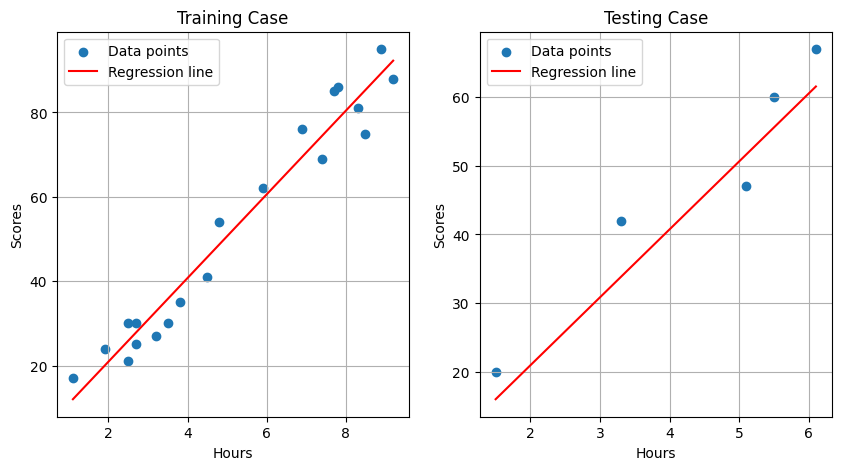

In [203]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train['Hours'], y_train, label='Data points')
x_range = [min(X_train['Hours']), max(X_train['Hours'])]
y_range = [beta + alpha * min(X_train['Hours']), beta + alpha * max(X_train['Hours'])]
plt.plot(x_range, y_range, color='red', label='Regression line')
plt.title("Training Case")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['Hours'], y_test, label='Data points')
x_range = [min(X_test['Hours']), max(X_test['Hours'])]
y_range = [beta + alpha * min(X_test['Hours']), beta + alpha * max(X_test['Hours'])]
plt.plot(x_range, y_range, color='red', label='Regression line')
plt.title("Testing Case")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid(True)
plt.legend()

plt.show()

Now with Gradient Descent

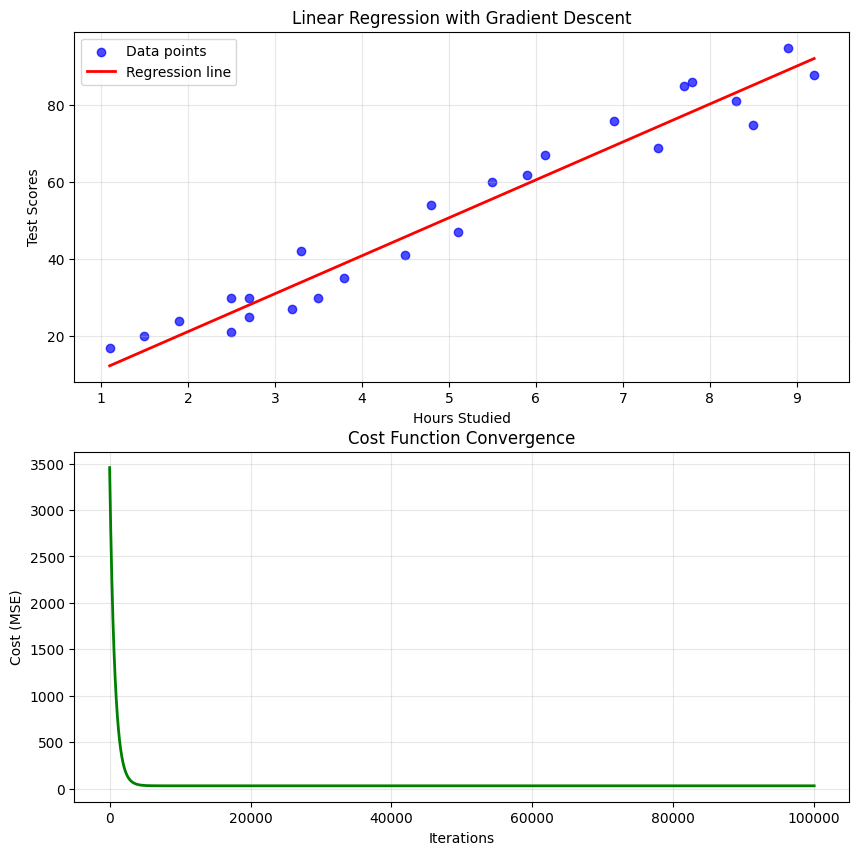


Gradient Descent Results:
Slope (m): 9.867243763509322, Intercept (b): 1.3927462851836108
Mean Squared Error (MSE): 29.334128901508116
Mean Absolute Error (MAE): 5.074821416509021


In [217]:
m = 0.0
b = 0.0
learning_rate = 0.00001
iterations = 100000
n = len(X_train)

cost_history = []

for i in range(iterations):
    Y_pred = m * X_train['Hours'] + b

    cost = (1/n) * sum((y_train - Y_pred) ** 2)
    cost_history.append(cost)

    D_m = (-2/n) * sum(X_train['Hours'] * (y_train - Y_pred))
    D_b = (-2/n) * sum(y_train - Y_pred)

    m = m - learning_rate * D_m
    b = b - learning_rate * D_b

Y_pred_final = m * X['Hours'] + b

#calculate results
mse_gd = mean_squared_error(y, Y_pred_final)
mae_gd = mean_absolute_error(y, Y_pred_final)

fig, ((ax1, ax2)) = plt.subplots(2, figsize=(10, 10))

#regression line
ax1.scatter(X['Hours'], y, color='blue', label='Data points')
x_range = np.linspace(min(X['Hours']), max(X['Hours']), 100)
y_range = m * x_range + b
ax1.plot(x_range, y_range, color='red', label='Regression line')
ax1.set_xlabel('Hours Studied')
ax1.set_ylabel('Test Scores')
ax1.set_title('Linear Regression with Gradient Descent')
ax1.legend()
ax1.grid(True, alpha=0.3)

#MSE plot
ax2.plot(cost_history, color='blue')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost (MSE)')
ax2.set_title('Cost Function Convergence')
ax2.grid(True, alpha=0.3)

plt.show()
#print the results out
print(f"\nGradient Descent Results:")
print(f"Slope (m): {m}, Intercept (b): {b}")
print(f"Mean Squared Error (MSE): {mse_gd}")
print(f"Mean Absolute Error (MAE): {mae_gd}")